# **Introdução da referência**

Até agora vimos como resolver o problema da regulação de estados apenas para zerar o estado final. No entanto, o objetivo do controle é fazer a saída rastrear a referência $r$.

Uma forma simples de fazer isso é usando o sinal de controle:

$$
\begin{align*}
u &= -\mathbf{Kx}+(N_u+\mathbf{K}\mathbf{N_x})r
\end{align*}
$$
onde $\mathbf{K}$ é o vetor de ganhos conforme já definimos e $N_u$ e $\mathbf{N_x}$ são as soluções do sistema

$$
\begin{align*}
\left[\begin{array}{cc}\mathbf{A} & \mathbf{B}\\ \mathbf{C} & D \end{array}\right]
\left[\begin{array}{cc}\mathbf{N_x}\\ N_u\end{array}\right] = 
\left[\begin{array}{cc}\mathbf{0}\\ 1\end{array}\right]
\end{align*}
$$

Se tiver interesse, a dedução para o método é simples e pode ser encontrada na seção 7.5.2 do livro texto.

É interessante visualizar como essa estratégia funciona do ponto de vista da rota de sinal. Estude a figura 7.15 a seguir:
<p align="center">
<img src="Fig7.15.svg" width="100%">
</p>

Repare que a parte (b) da figura é apenas uma simplificação, mostrando que o controle funciona como uma realimentação negativa normal do sistema, mas a referência entra na malha multiplicada por uma constante.

## **Exemplo**

<p align="center">
<img src="Ex.7.18.svg" width="80%">
</p>

Esse é o sistema do pêndulo novamente. As matrizes $\mathbf{A}$ e $\mathbf{B}$ já são conhecidas. Também usaremos:

$$
\begin{align*}
\mathbf{C} &=\left[\begin{array}{cc}1 & 0\end{array}\right]\\
D &=0
\end{align*}
$$

Para resolver o problema vamos resolver o sistema de equações como $\mathbf{M}^{-1}\mathbf{v}$, onde:

$$
\begin{align*}
\mathbf{M} &= \left[\begin{array}{cc}\mathbf{A} & \mathbf{B}\\ \mathbf{C} & D\end{array}\right]\\
\mathbf{v} &=\left[\begin{array}{ccc}0 & 0 & 1\end{array}\right]^T 
\end{align*}
$$


In [1]:
# Imports
import numpy as np
from escrever import *
from IPython.display import display, Math
esc = escrever()

In [2]:
# Define as matrizes do sistema
w0 = 1
A = np.matrix([[0,1],[-w0**2,0]])
B = np.matrix([[0],[1]])
C = np.matrix([1,0])
D = np.matrix([0])

In [4]:
# Constroi a matriz usando blocos
M = np.block([[A,B],[C,D]])
display(Math(r'\mathbf{M} = ' + esc.mat(M)))

<IPython.core.display.Math object>

In [6]:
# Define o lado direito da equação
v = np.matrix([0,0,1]).T
display(Math(r'\mathbf{v} = ' + esc.mat(v)))

<IPython.core.display.Math object>

In [14]:
# Resolve o sistema linear para achar o vetor N
NN = np.linalg.solve(M,v)
display(Math(r'\mathbf{N} = ' + esc.mat(NN)))

<IPython.core.display.Math object>

In [15]:
# Separa Nx
Nx = NN[0:2]
display(Math(r'\mathbf{N_x} = ' + esc.mat(Nx)))

<IPython.core.display.Math object>

In [16]:
# Separa Nu
Nu = NN[-1]
display(Math(r'\mathbf{N_u} = ' + esc.mat(Nu)))

<IPython.core.display.Math object>

In [17]:
# O ganho de realimentação de estados já havia sido calculado
K = np.matrix([3*w0**2,4*w0])
display(Math(r'\mathbf{K} = ' + esc.mat(K)))

<IPython.core.display.Math object>

In [28]:
# Pode-se agora calcular o "ganho" da referência
N = (Nu+K@Nx)[0,0]
eq1 = r'N = N_u+ \mathbf{K}\mathbf{N_x} = '
eq2 = f'{Nu[0,0]}' + ' + ' + esc.mat(K) + esc.mat(Nx) + ' = ' 
eq3 = f'{(Nu+K@Nx)[0,0]}'
display(Math(eq1 + eq2 + eq3))

<IPython.core.display.Math object>

É interessante testar o projeto agora usando uma resposta ao degrau. Porém, note que para isso, precisamos definir o sistema em malha fechada.

Em malha fechada as matrizes não serão as mesmas. A matriz $\mathbf{A}$ muda pois o sistema teve os estados realimentados. Além disso, a referência passa a ser a nossa entrada, já que o sinal $u$ foi substituido por $u=-\mathbf{Kx}+Nr$. A saída permanence a mesma $y=x_1$. 

Observe no código abaixo como o sistema é definido antes de calcular a resposta ao degrau.

In [31]:
# Calcula as matrizes de malha fechada
Amf = A - B@K
Bmf = B*N
display(Math(r'\mathbf{A}_{\text{mf}} = \mathbf{A-BK} = ' + esc.mat(A) + '-' + esc.mat(B) + esc.mat(K)))
display(Math(r'\mathbf{A}_{\text{mf}} = ' + esc.mat(Amf) ))
display(Math(r'\mathbf{B}_{\text{mf}} = \mathbf{B}N = ' + esc.mat(B) + f'{N}' + '=' + esc.mat(Bmf)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [32]:
# Define o sistema em MF e calcula resposta ao degrau unitário
import control as ct
sys = ct.ss(Amf,Bmf,C,D)
esc.sist(Amf,Bmf,C,D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
# Relatório de pólos em MF
tab = ct.damp(sys)

_____Eigenvalue______ Damping___ Frequency_
        -2                     1          2
        -2                     1          2


In [35]:
# Zeros de transmissão
ct.zeros(sys)

array([], dtype=complex128)

O sistema não tem zeros e os pólos foram alocados em $-2$ e $-2$.

In [36]:
# Simula o sistema para uma resposta ao degrau
t,y = ct.step_response(sys,7)

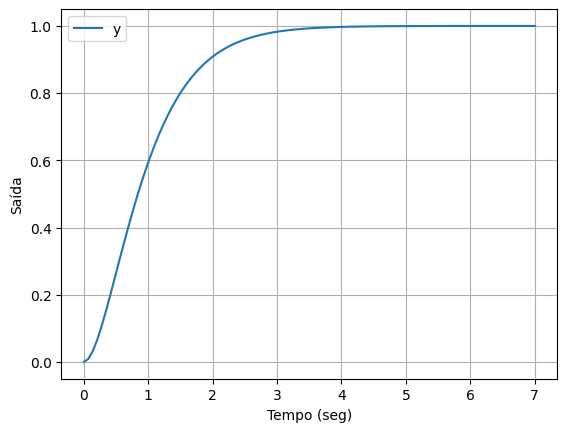

In [37]:
# Plota os resultados, com algumas legendas
import matplotlib.pyplot as plt
plt.plot(t,y)
plt.grid()
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída')
plt.legend('y')

Observação: se quisermos obter os outros sinais do sistema, tais como o sinal de controle usado e os estados, basta definir uma matriz $\mathbf{C = -K}$. Isso é apenas para forçar o programa de simulação a devolver esses resultados e não realmente definir uma saída nova para o sistema, com significado físico novo.